In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Escreva uma rotina para gerar um conjunto de N dados com função densidade de probabilidade gaussiana de valor verdadeiro x_0=50 com desvio-padrão σ_0=10 e que retorne o valor médio, x_m, e o correspondente desvio-padrão da média, s_m = s/√N, onde s é o desvio-padrão amostral estimado com L=N-1 graus de liberdade.

In [2]:
def gera_dados(x0, σ0, N):
    D = x0 + σ0 * np.random.randn(N)
    return np.array([np.mean(D), np.std(D, ddof=1)/np.sqrt(N)])

a) Considere o caso em que o número de dados de cada conjunto seja 𝑁 = 3. 

a.1) Determine, usando a tabela de limites críticos para o teste “𝑡” qual é o valor crítico 𝑡2,
que encerra um intervalo de confiança de 95,45% de que o módulo da variável 𝑡 seja
menor que 𝑡2.

< 4.53

a.2) Faça o mesmo para o teste “𝑧” (isto é, determine o valor crítico 𝑧2 que encerra um
intervalo de confiança de 95,45% de que o módulo da variável 𝑧 seja menor que 𝑧2).

< 2

b) Use a rotina descrita no enunciado para gerar 𝑁𝑅𝐸𝑃 = 10.000 conjuntos de 𝑁 dados cada e, para cada conjunto gerado, determine o valor da variável aleatória “𝑡” (𝑡 =𝑥𝑚−𝑥0 / 𝜎̃𝑚). Calcule 𝑓𝑡2, a frequência relativa de valores de 𝑡 que têm módulo menor ou igual a 𝑡2 , e sua respectiva incerteza.

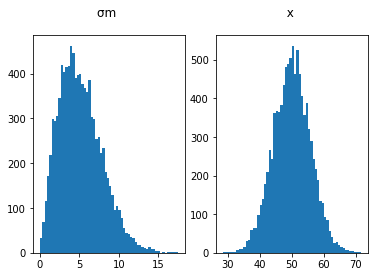

teste-t =  0.9554  +-  0.0021


In [3]:
x0, σ0, N, NREP = 50, 10, 3, 10000
Dados = np.zeros((NREP,2))
for i, ival in enumerate(Dados): Dados[i] = gera_dados(x0, σ0, N)
    
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('σm                                            x')
ax1.hist(Dados[:,1], bins=60)
ax2.hist(Dados[:,0], bins=60)
plt.show()

t = (Dados[:,0] - x0) / Dados[:,1]
t2c = 4.53
print('teste-t = ',np.sum(abs(t) <= t2c)/NREP, ' +- ', np.round(np.sqrt(np.sum(abs(t) <= t2c) * (1 - np.sum(abs(t) <= t2c)/NREP))/NREP, decimals=4))

c) Use a rotina descrita no enunciado para gerar outros 𝑁𝑅𝐸𝑃 = 10.000 conjuntos de 𝑁 dados cada e, para cada conjunto gerado, determine o valor da variável aleatória “z” (𝑧 = (𝑥𝑚−𝑥0) / 𝜎𝑚0), onde 𝜎𝑚0 é o valor verdadeiro do desvio-padrão da média (𝜎𝑚0 = 𝜎0/√𝑁). Em seguida, calcule 𝑓𝑧2, a frequência relativa de valores de 𝑧 que têm módulo menor ou igual a 𝑧2 , e sua respectiva incerteza.

In [4]:
Dados = np.zeros((NREP,2))
for i, ival in enumerate(Dados): Dados[i] = gera_dados(x0, σ0, N)
    
z = (Dados[:,0] - x0) / (σ0/np.sqrt(N))
z2c = 2

print( 'teste-z = ',np.sum(abs(z) <= z2c)/NREP, ' +- ', np.round(np.sqrt(np.sum(abs(z) <= z2c) * (1 - np.sum(abs(z) <= z2c)/NREP))/NREP, decimals=4))

teste-z =  0.9522  +-  0.0021


d) Refaça para o caso em que o número de dados gerados em cada conjunto seja 𝑁 = 101.

In [5]:
N = 101
Dados = np.zeros((NREP,2))
for i, ival in enumerate(Dados): Dados[i] = gera_dados(x0, σ0, N)
t = (Dados[:,0] - x0) / Dados[:,1]
t2c = 2.03
print( 'teste-t = ',np.round(np.sum(abs(t) <= t2c)/NREP, decimals=5), ' +- ', np.round(np.sqrt(NREP * np.sum(abs(t) <= t2c)/NREP * (1 - np.sum(abs(t) <= t2c)/NREP))/NREP, decimals=4))

Dados = np.zeros((NREP,2))
for i, ival in enumerate(Dados): Dados[i] = gera_dados(x0, σ0, N)    
z = (Dados[:,0] - x0) / (σ0/np.sqrt(N))
z2c = 2
print( 'teste-z = ',np.sum(abs(z) <= z2c)/NREP, ' +- ', np.round(np.sqrt(NREP * np.sum(abs(z) <= z2c)/NREP * (1 - np.sum(abs(z) <= z2c)/NREP))/NREP, decimals=4))

teste-t =  0.9503  +-  0.0022
teste-z =  0.9562  +-  0.002
